# Differential Programming a quantum circuit

`Yao.jl` + `Zygote.jl`

In [12]:
using Yao
using YaoAD
using LinearAlgebra
using QuAlgorithmZoo: heisenberg, random_diff_circuit, pair_ring

## Define a hamiltonian

In [3]:
# generate a Heisenberg Model Hamiltonian
nbit = 4
hami = heisenberg(nbit)

nqubits: 4
sum
├─ sum
│  ├─ sum
│  │  ├─ sum
│  │  │  ├─ chain
│  │  │  │  ├─ put on (2)
│  │  │  │  │  └─ X gate
│  │  │  │  └─ put on (1)
│  │  │  │     └─ X gate
│  │  │  ├─ chain
│  │  │  │  ├─ put on (2)
│  │  │  │  │  └─ Y gate
│  │  │  │  └─ put on (1)
│  │  │  │     └─ Y gate
│  │  │  └─ chain
│  │  │     ├─ put on (2)
│  │  │     │  └─ Z gate
│  │  │     └─ put on (1)
│  │  │        └─ Z gate
│  │  └─ sum
│  │     ├─ chain
│  │     │  ├─ put on (3)
│  │     │  │  └─ X gate
│  │     │  └─ put on (2)
│  │     │     └─ X gate
│  │     ├─ chain
│  │     │  ├─ put on (3)
│  │     │  │  └─ Y gate
│  │     │  └─ put on (2)
│  │     │     └─ Y gate
│  │     └─ chain
│  │        ├─ put on (3)
│  │        │  └─ Z gate
│  │        └─ put on (2)
│  │           └─ Z gate
│  └─ sum
│     ├─ chain
│     │  ├─ put on (4)
│     │  │  └─ X gate
│     │  └─ put on (3)
│     │     └─ X gate
│     ├─ chain
│     │  ├─ put on (4)
│     │  │  └─ Y gate
│     │  └─ put on (3)
│     │     └─ Y gate
│ 

## Matrix Representation of the model Hamiltonian

In [4]:
h = mat(hami)

16×16 SparseArrays.SparseMatrixCSC{Complex{Float64},Int64} with 36 stored entries:
  [1 ,  1]  =  4.0+0.0im
  [3 ,  2]  =  2.0+0.0im
  [9 ,  2]  =  2.0+0.0im
  [2 ,  3]  =  2.0+0.0im
  [5 ,  3]  =  2.0+0.0im
  [6 ,  4]  =  2.0+0.0im
  [11,  4]  =  2.0+0.0im
  [3 ,  5]  =  2.0+0.0im
  [9 ,  5]  =  2.0+0.0im
  [4 ,  6]  =  2.0+0.0im
  [6 ,  6]  =  -4.0+0.0im
  [7 ,  6]  =  2.0+0.0im
  ⋮
  [10, 11]  =  2.0+0.0im
  [11, 11]  =  -4.0+0.0im
  [13, 11]  =  2.0+0.0im
  [8 , 12]  =  2.0+0.0im
  [14, 12]  =  2.0+0.0im
  [6 , 13]  =  2.0+0.0im
  [11, 13]  =  2.0+0.0im
  [12, 14]  =  2.0+0.0im
  [15, 14]  =  2.0+0.0im
  [8 , 15]  =  2.0+0.0im
  [14, 15]  =  2.0+0.0im
  [16, 16]  =  4.0+0.0im

## classical variational eigensolver

In [13]:
f(x) = real(x'*h*x/(x'*x))[]

x = randn(ComplexF64, size(h, 2))
α = 0.5

loss_history = Float64[]
for i = 1:200
    g = f'(x)
    x -= α .* g
    push!(loss_history, f(x))
end

## Result

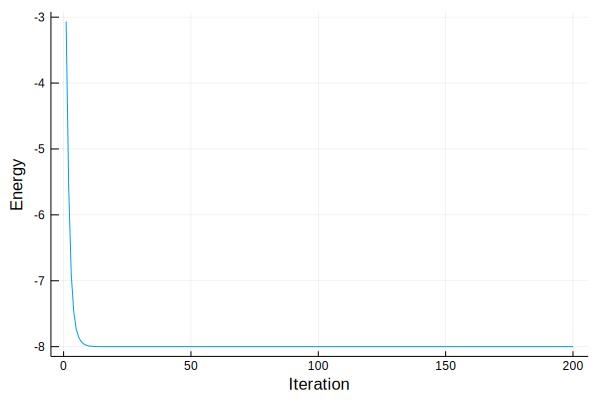

In [14]:
using Plots
ax = plot(1:200, loss_history, xlabel="Iteration", ylabel="Energy", legend=nothing)

## A Quantum Circuit Ansatz
![_differentiable.png](images/_differential.png)

In [7]:
# Generate a circuit as a wave function ansatz
circuit = random_diff_circuit(nbit, 2, pair_ring(nbit))

nqubits: 4
chain
├─ chain
│  ├─ chain
│  │  ├─ put on (1)
│  │  │  └─ rot(X gate, 0.0)
│  │  └─ put on (1)
│  │     └─ rot(Z gate, 0.0)
│  ├─ chain
│  │  ├─ put on (2)
│  │  │  └─ rot(X gate, 0.0)
│  │  └─ put on (2)
│  │     └─ rot(Z gate, 0.0)
│  ├─ chain
│  │  ├─ put on (3)
│  │  │  └─ rot(X gate, 0.0)
│  │  └─ put on (3)
│  │     └─ rot(Z gate, 0.0)
│  └─ chain
│     ├─ put on (4)
│     │  └─ rot(X gate, 0.0)
│     └─ put on (4)
│        └─ rot(Z gate, 0.0)
├─ chain
│  ├─ control(1)
│  │  └─ (2,) X gate
│  ├─ control(2)
│  │  └─ (3,) X gate
│  ├─ control(3)
│  │  └─ (4,) X gate
│  └─ control(4)
│     └─ (1,) X gate
├─ chain
│  ├─ chain
│  │  ├─ put on (1)
│  │  │  └─ rot(Z gate, 0.0)
│  │  ├─ put on (1)
│  │  │  └─ rot(X gate, 0.0)
│  │  └─ put on (1)
│  │     └─ rot(Z gate, 0.0)
│  ├─ chain
│  │  ├─ put on (2)
│  │  │  └─ rot(Z gate, 0.0)
│  │  ├─ put on (2)
│  │  │  └─ rot(X gate, 0.0)
│  │  └─ put on (2)
│  │     └─ rot(Z gate, 0.0)
│  ├─ chain
│  │  ├─ put on (3)
│  │  │  └─ ro

## The loss function

Note the `apply!` function is inplace, is a buggy feature in `Zygote`, we use `mat` instead.

In [8]:
v0 = statevec(zero_state(nbit))
function energy(circuit)
    v = mat(circuit) * v0
    (v'* h * v)[] |> real
end

energy (generic function with 1 method)

## Train with Adam optimizer

In [9]:
using Flux: ADAM, Optimise
function train!(lossfunc, circuit, optimizer; maxiter::Int=200)
    dispatch!(circuit, :random)
    params = parameters(circuit)
    loss_history = Float64[]
    for i = 1:maxiter
        # collect gradients from returned structured data
        grad = collect_gradients(lossfunc'(circuit))
        Optimise.update!(optimizer, params, grad)
        dispatch!(circuit, params)
        eng = lossfunc(circuit)
        push!(loss_history, eng)
    end
    loss_history
end

train! (generic function with 1 method)

## Training Result

In [10]:
using Random
Random.seed!(42)
EG = eigvals(Matrix(h))[1]
println("$nbit site Heisenberg model, exact ground state energy = $EG")
loss_history = train!(energy, circuit, ADAM(0.1); maxiter=200);

4 site Heisenberg model, exact ground state energy = -8.0


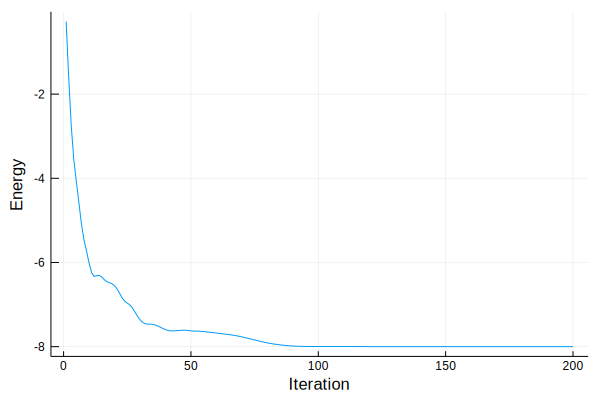

In [11]:
ax = plot(1:200, loss_history, xlabel="Iteration", ylabel="Energy", legend=nothing)